<a href="https://colab.research.google.com/github/francoisjaulin/Hill_functions/blob/master/IBENS_Theoretical_System_Bio_Hill_equation_&_autopromotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Packages Importation

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definition of a Hill function
A : concentration

In [8]:
def hill(A):
  h=2.0
  A0=10
  theta = A**h/(A0**h + A**h)
  return theta

print"Hill function of concentration 1 =", hill(1)
print"Hill function of concentration 100 = %.3f" % hill(100)

Hill function of concentration 1 = 0.00990099009901
Hill function of concentration 100 = 0.990


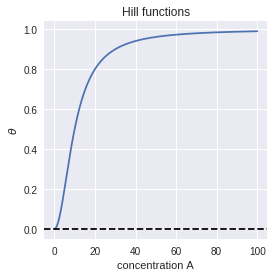

In [39]:
concentrations= np.linspace(0,100,1000) #1000 euqally-spaced values between 0 and 100
thetas=hill(concentrations)


plt.figure(figsize=(4,4))
plt.plot(concentrations, thetas)
plt.xlabel('concentration A')
plt.ylabel('$\\theta$')
plt.axhline([0], color='black', linestyle='--')
plt.title('Hill functions')
plt.show()

At what concentration A_t does the Hill funciton reach $\theta$=0.75?

In [17]:
best_index = np.argmin((thetas-0.75)**2.)
A_t = concentrations[best_index]
print("with parameters A0=%.1f, h=%.1f, thetas reaches 0.75 for A_t = %.1f" %(10, 2, A_t))


with parameters A0=10.0, h=2.0, thetas reaches 0.75 for A_t = 17.3


Let's define a function find_A_t(theta_0) and outputs the concentration $A_t$ such that theta=theta_0

In [26]:
def find_A_t(theta_0):
  A_t = concentrations[np.argmin((thetas-theta_0)**2.)]
  return A_t
find_A_t(0.75)
find_A_t(0.9)

30.030030030030034

In [28]:
print("with parameters A0=%.1f, h=%.1f, theta reaches 0.9 for A_t=%.1f") % (10,2,find_A_t(0.9))

with parameters A0=10.0, h=2.0, theta reaches 0.9 for A_t=30.0


Let's define a Hill2 Function 

In [0]:
def hill_2(A, h, A0):
  theta= A**h /(A0**h + A**h)
  return theta


def find_A_t_2(theta_0, h, A0):
  concentrations =np.linspace(0, 100, 1000)
  thetas=hill_2(concentrations, h, A0)
  best_index=np.argmin((thetas-theta_0)**2.)
  A_t=concentrations[best_index]
  return A_t


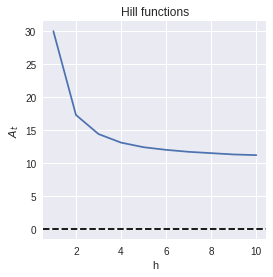

In [38]:
hs=np.linspace(1, 10, 10)
hs
A_ts=[]

for h in hs:
  A_t=find_A_t_2(0.75, h, 10)
  A_ts.append(A_t)

plt.figure(figsize=(4,4))
plt.plot(hs, A_ts)
plt.xlabel('h')
plt.ylabel('$A_t$')
plt.axhline([0], color='black', linestyle='--')
plt.title('Hill functions')
plt.show()


### **Autopromotor**

In [0]:
def euler_integrate(f, times, y0):
  dt=times[0]-times[1]
  sol = np.zeros(len(times))
  sol[0]=y0
  
  for t in range(1, len(times)):
    sol[t]=f(sol[t-1])*dt+sol[t-1]
  return sol
    
def dAdt(A):
  h=4.0
  delta_A=1.0
  A0=1.0
  r0=0.3
  r1=2
  dadt=(r0 +r1 *(A/A0)**h)/(1+(A/A0)**h)- delta_A * A
  return dadt
  
A0_1=0.7
A0_2=0.9


  

In [0]:
times=np.linspace(1,20,1000)
sol1= euler_integrate(dAdt, times, A0_1)
sol2= euler_integrate(dAdt, times, A0_2)

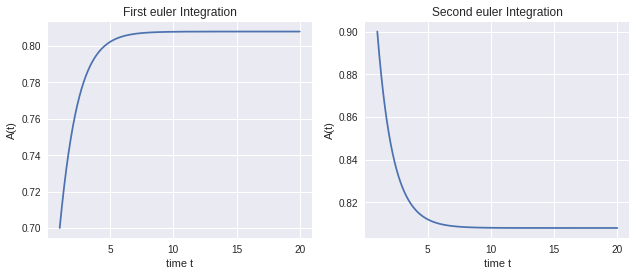

In [50]:
plt.figure(figsize=(9,4))

plt.subplot(121)
plt.plot(times, sol1, label='A_0=%.2f' %A0_1)
plt.xlabel('time t')
plt.ylabel('A(t)')
plt.title('First euler Integration')
plt.legend

plt.subplot(122)
plt.plot(times, sol2, label='A_0=%.2f' %A0_2)
plt.xlabel('time t')
plt.ylabel('A(t)')
plt.title('Second euler Integration')
plt.legend

plt.tight_layout()
plt.show()